### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### importing Data set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv',header=0)

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Replacing Values

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

In [8]:
numeric_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [9]:
categorical_features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [10]:
#### removing spaces from dataset

for feature in categorical_features:
    df[feature] = df[feature].str.strip()

In [11]:
df['income'] = df['income'].replace('<=50K.','<=50K' )
df['income'] = df['income'].replace('>50K.', '>50K')

In [12]:
columns_with_nan = ['workclass', 'occupation', 'native.country' ]

for column in  columns_with_nan:
    df[column].fillna(df[column].mode()[0], inplace=True)
#     df_copy[column].fillna(data_copy[column].mode()[0], inplace = True)

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Removing Duplicates

In [14]:
df.duplicated().sum()

24

In [15]:
df = df.drop_duplicates()

In [16]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [17]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking Distribution of Data

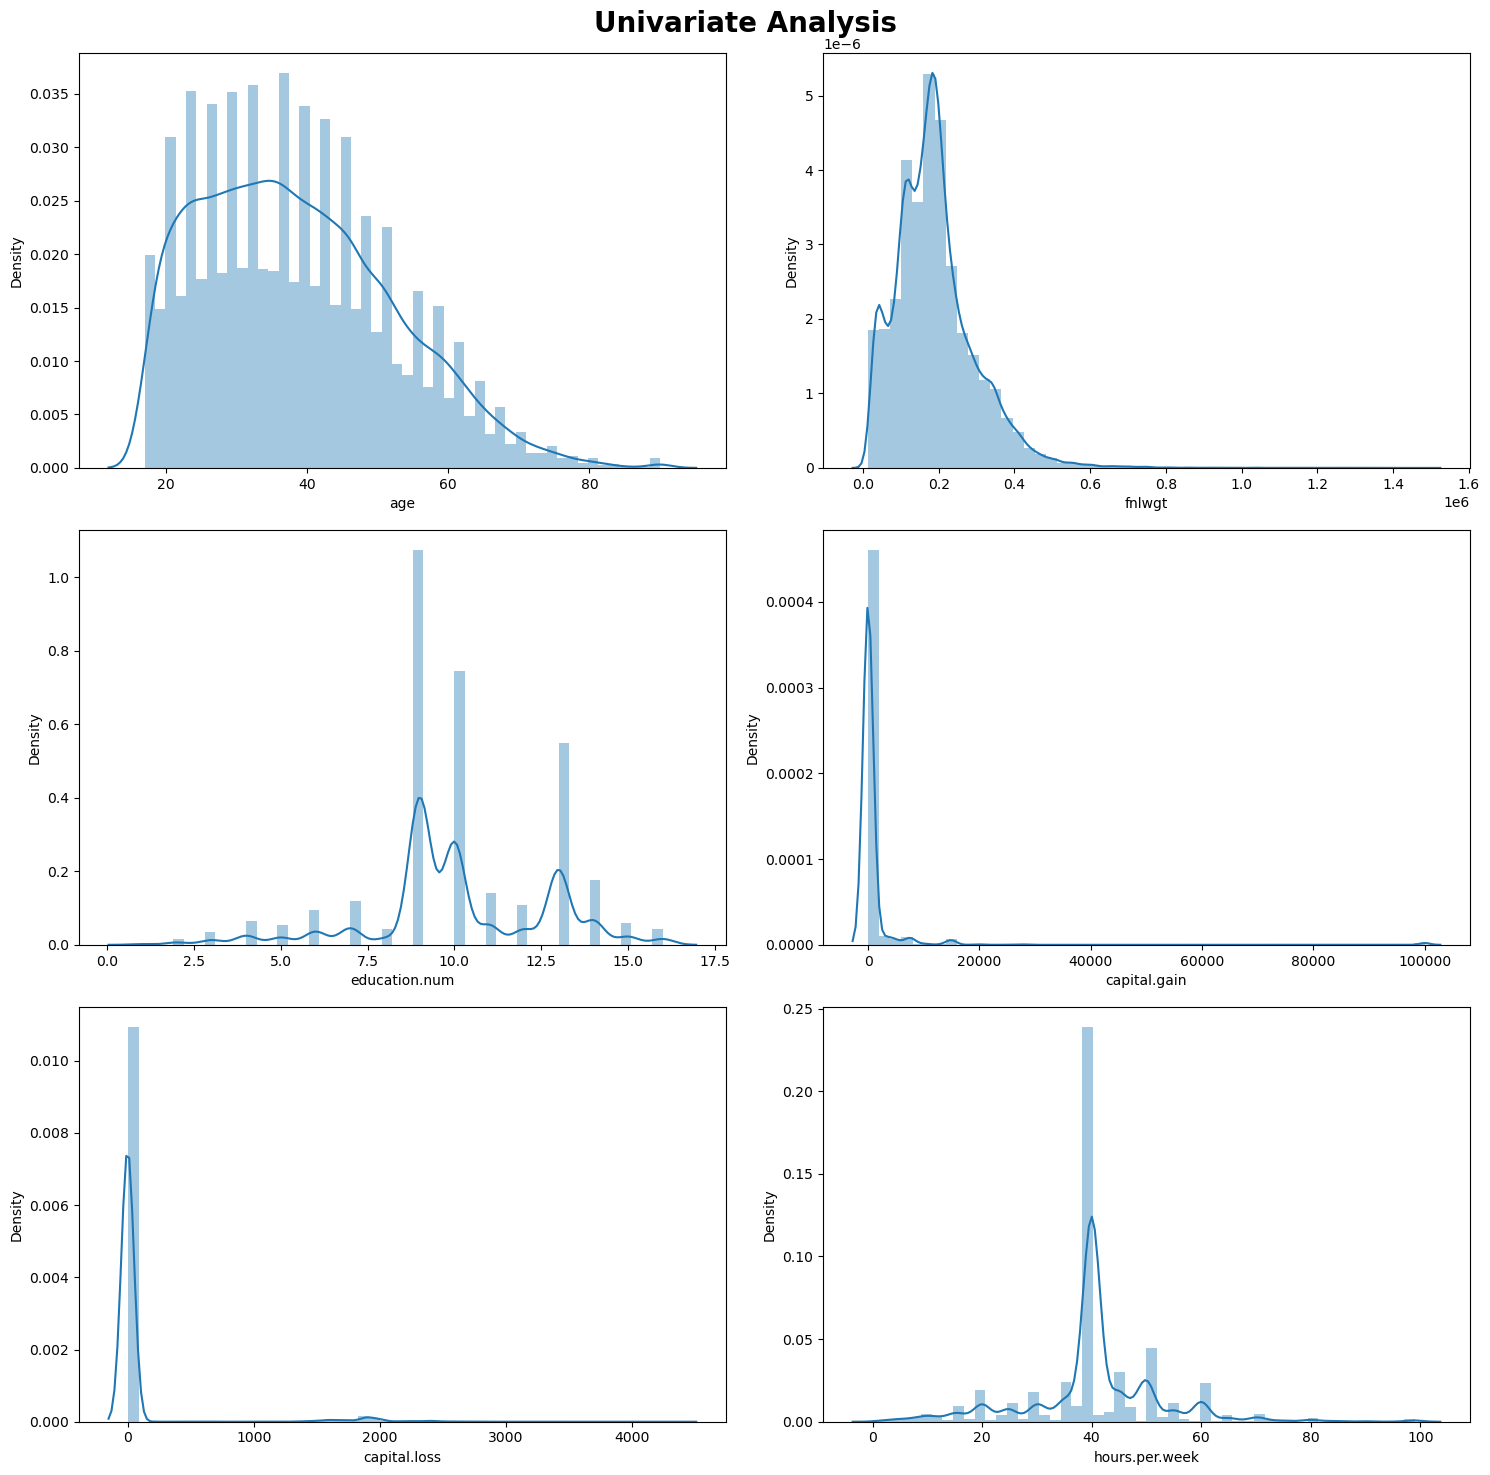

In [18]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis", fontsize = 20, fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(3,2,i+1)
    sns.distplot(x=df[numeric_features[i]], kde=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Checking Correlation b/w data

<AxesSubplot: >

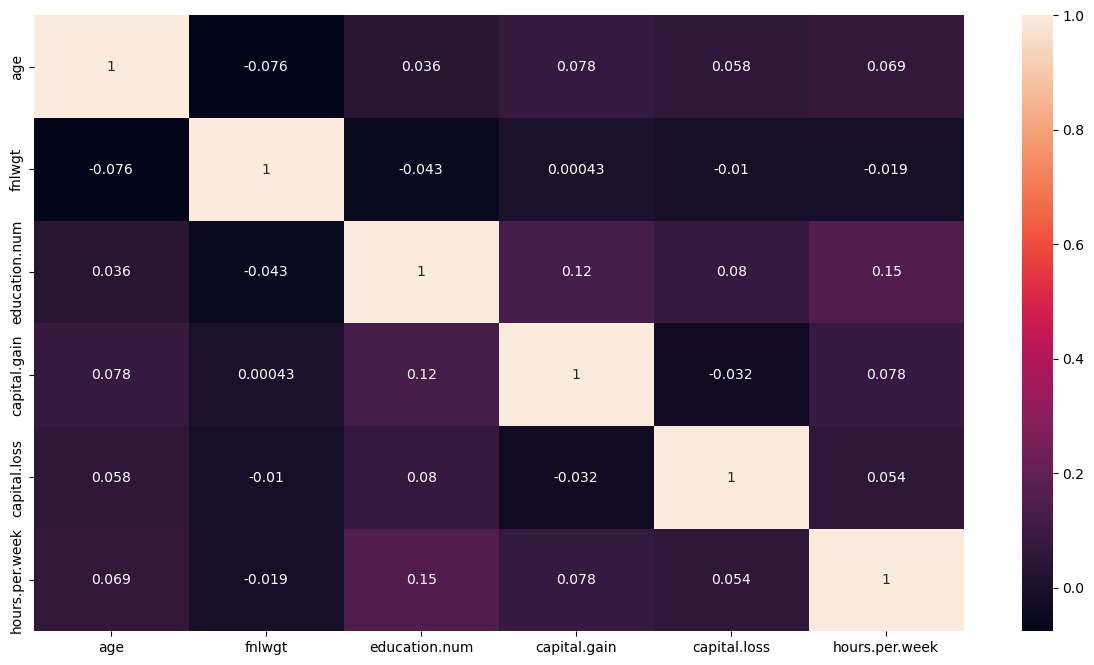

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df[numeric_features].corr(), annot=True)

checking for multicollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(df[numeric_features].values, i) for i in range(len(df[numeric_features].columns))]
vif_data['features'] = df[numeric_features].columns
vif_data

,VIF,features
0,7.247984,age
1,3.682915,fnlwgt
2,10.991811,education.num
3,1.033006,capital.gain
4,1.056849,capital.loss
5,9.763101,hours.per.week


### observation
As education num has VIF greater than 10 so we have to drop it

In [22]:
## dropping education - num column

df.drop(['education.num'], axis=1, inplace=True)

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [24]:
numeric_features

['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

Label encoding -- > Converting calssification values to numeric equivalaents

In [25]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

### Splitting dependent and independent variable

In [26]:
X = df.drop('income', axis=1)
y = df['income']

In [27]:

### train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Logistic model building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred_logreg = log_reg.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred_logreg)

0.805060438434747

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7456
           1       0.74      0.27      0.40      2306

    accuracy                           0.81      9762
   macro avg       0.77      0.62      0.64      9762
weighted avg       0.79      0.81      0.77      9762



### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt = dt.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred_dt)

0.8114115959844295

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7456
           1       0.60      0.62      0.61      2306

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



### SVC

In [37]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
clf = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')

In [38]:
clf = clf.fit(X_train,y_train)

In [39]:
y_pred_svc = clf.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_svc)

0.7637779143618111

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      7456
           1       0.00      0.00      0.00      2306

    accuracy                           0.76      9762
   macro avg       0.38      0.50      0.43      9762
weighted avg       0.58      0.76      0.66      9762



In [42]:
#### standardizing data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred_logreg_scaled = log_reg_scaled.predict(X_test_scaled)

In [45]:
accuracy_score(y_test, y_pred_logreg_scaled)

0.8049580004097521

In [46]:
print('=========Classification Report of Logistic Regression with Scaled Data==========')
print(classification_report(y_test, y_pred_logreg_scaled))

=========Classification Report of Logistic Regression with Scaled Data==========
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7456
           1       0.68      0.33      0.44      2306

    accuracy                           0.80      9762
   macro avg       0.75      0.64      0.66      9762
weighted avg       0.79      0.80      0.78      9762



In [47]:
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [48]:
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)
accuracy_score(y_test, y_pred_dt_scaled)

0.8120262241343987

In [49]:
from sklearn.metrics import classification_report
print('=========Classification Report of Decision Tree Classifier with Scaled Data==========')
print(classification_report(y_test, y_pred_dt_scaled))

=========Classification Report of Decision Tree Classifier with Scaled Data==========
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7456
           1       0.60      0.62      0.61      2306

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



In [50]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
clf_scaled = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf',probability=True)

In [51]:
clf_scaled = clf_scaled.fit(X_train_scaled,y_train)

In [52]:
y_pred_svc_scaled = clf_scaled.predict(X_test_scaled)

In [53]:
accuracy_score(y_test, y_pred_svc_scaled)

0.821040770333948

In [54]:
print('=========Classification Report of Support Vector Classifier with Scaled Data==========')
print(classification_report(y_test, y_pred_svc_scaled))

=========Classification Report of Support Vector Classifier with Scaled Data==========
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7456
           1       0.68      0.47      0.55      2306

    accuracy                           0.82      9762
   macro avg       0.76      0.70      0.72      9762
weighted avg       0.81      0.82      0.81      9762



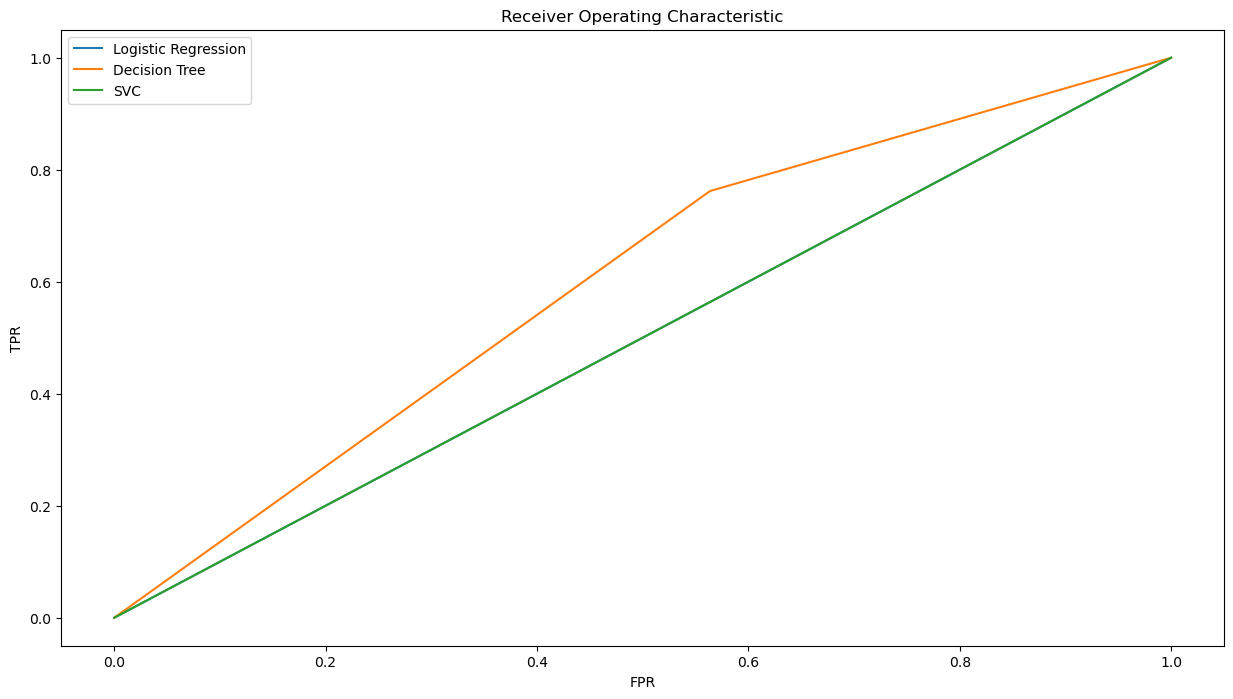

In [55]:
plt.figure(figsize=(15,8))

#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = log_reg_scaled.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt_scaled.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = clf_scaled.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)


# plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "SVC")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_prob1)
auc_score2 = roc_auc_score(y_test, y_pred_prob2)
auc_score3 = roc_auc_score(y_test, y_pred_prob3)

print(auc_score1,auc_score2,auc_score3)

0.5 0.5991091652118564 0.5


###  More ML techniques

In [57]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
extra_model = ExtraTreeClassifier()
extra_model.fit(X,y)
feature_imp = extra_model.feature_importances_

In [60]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 14.51
1 4.72
2 16.51
3 9.1
4 19.78
5 8.31
6 1.21
7 1.37
8 0.52
9 9.76
10 2.58
11 9.96
12 1.67


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int64
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int64
 4   marital.status  32537 non-null  int64
 5   occupation      32537 non-null  int64
 6   relationship    32537 non-null  int64
 7   race            32537 non-null  int64
 8   sex             32537 non-null  int64
 9   capital.gain    32537 non-null  int64
 10  capital.loss    32537 non-null  int64
 11  hours.per.week  32537 non-null  int64
 12  native.country  32537 non-null  int64
dtypes: int64(13)
memory usage: 3.5 MB


In [62]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [63]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred = rf.predict(X_test)

### RF Accuracy

In [66]:
accuracy_score(y_test,y_pred) 

0.8543331284572834

### Bagging Accuracy

In [67]:
cls = BaggingClassifier(rf, random_state=0).fit(X_train, y_train)
cls.score(X_test, y_test)

0.8602745339069863

### Extra Tree Classifier Accuracy

In [68]:
extra_tree = ExtraTreeClassifier(random_state=0)
cls_extra = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
cls_extra.score(X_test, y_test)

0.8407088711329646

In [69]:
clf1 = ExtraTreeClassifier(random_state=0)
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier()

### Voting Classifier

In [70]:
eclf1 = VotingClassifier(estimators=[
    ('ETC', clf1), ('RF', clf2), ('DT', clf3),('Bagging',cls)], voting='hard')

In [77]:
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [80]:
eclf2 = VotingClassifier(estimators=[
    ('ETC', clf1), ('RF', clf2), ('DT', clf3),('Bagging',cls)], voting='soft')

In [81]:
eclf2 = eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0
